In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_con=pd.read_csv("concrete.csv")
raw_con.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
raw_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
raw_con.shape

(1030, 9)

In [5]:
raw_con.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [6]:
raw_con[raw_con.duplicated()]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [7]:
raw_con.duplicated().sum()

25

There are 25 duplacates available in the dataset. So,we have to drop those duplicate values.

In [80]:
#Removing duplicates
con=raw_con.drop_duplicates()
con.shape

(1005, 9)

In [9]:
#confirming the availability of duplicates after removing
con.duplicated().sum()

0

In [10]:
con.isnull().values.any()

False

shows True==> if any missing values is there.

  False==> if any missing values is not there.
Here, Dataset has no missing Values.

In [11]:
#checking for null values
con.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [12]:
##5 point summary of numerical attributes
con.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


In [13]:
con.skew()

cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age             3.253974
strength        0.395696
dtype: float64

When, Skewness=0 ==>normal distribution

Skewness>0 ==>positively skewed distribution/Right skewed Distribution. (has a long right tail).

Skewness<0==>negatively skewed distribution/Left skewed Distribution. (has a long left tail).

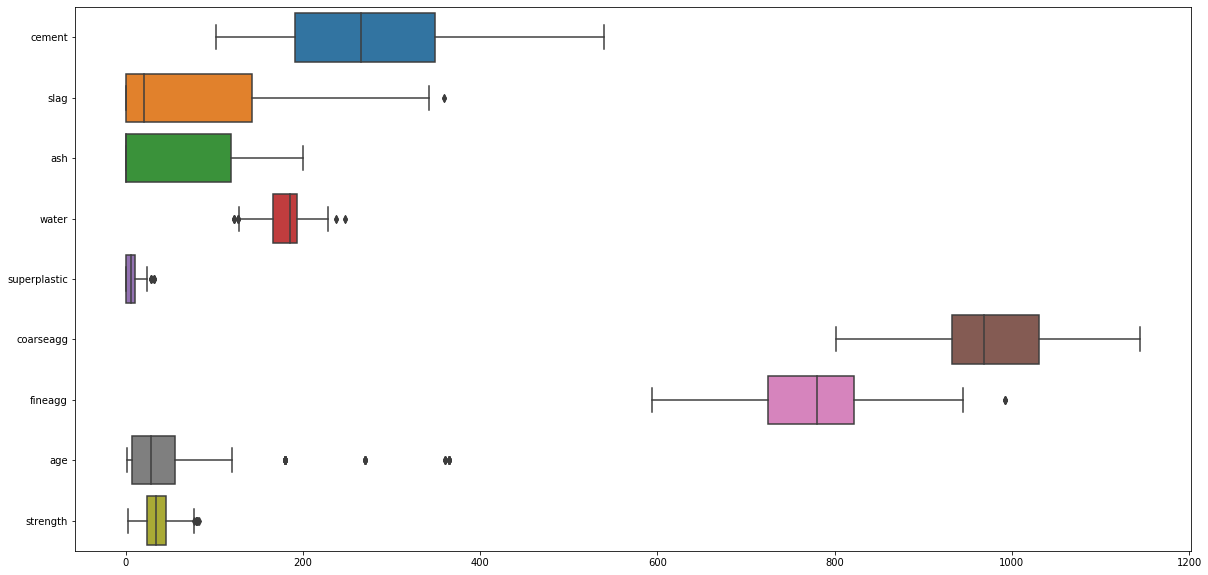

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(data=con,orient="h")

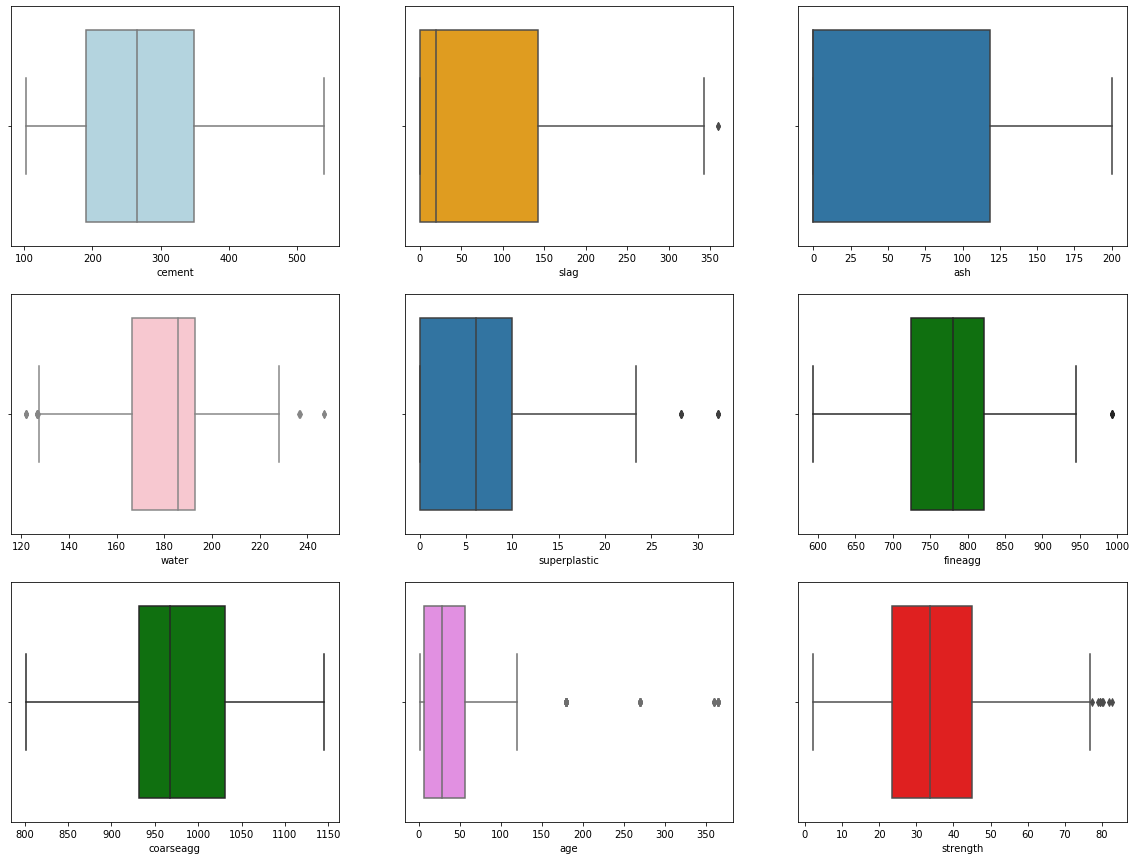

In [15]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x= con['cement'], color='lightblue')
plt.subplot(3,3,2)
sns.boxplot(x= con['slag'], color='orange')
plt.subplot(3,3,3)
sns.boxplot(x= con['ash'])
plt.subplot(3,3,4)
sns.boxplot(x= con['water'], color='pink')
plt.subplot(3,3,5)
sns.boxplot(x= con['superplastic'])
plt.subplot(3,3,6)
sns.boxplot(x= con['fineagg'], color='green')
plt.subplot(3,3,7)
sns.boxplot(x= con['coarseagg'], color='green')
plt.subplot(3,3,8)
sns.boxplot(x= con['age'], color='violet')
plt.subplot(3,3,9)
sns.boxplot(x= con['strength'], color='red')

we can see some of attributes have outliers which is visible with all dotted points

In [16]:
def find_outliers(data):
    outliers=[]
    sorted_data=sorted(data)
    q1,q2,q3=np.percentile(sorted_data,[25,50,75])
    iqr=q3-q1
    min=q1-1.5*iqr
    max=q3+1.5*iqr
    for i in data:
        if i<min or i>max:
            outliers.append(i)
    print("The number of outliers present are:",len(outliers))
    print("Above",max,"are outliers")
    print("range:",data.max()-data.min())
    print("1st quartile(q1):",q1)
    print("3rd quartile(q3):",q3)
    print("Inter quartile range(IQR):",iqr)

#### Univariate Analysis

##### Cement 

In [17]:
print('Minimum value: ', con['cement'].min())
print('Maximum value: ',con['cement'].max())
print('Mean value: ', con['cement'].mean())
print('Median value: ',con['cement'].median())
print('Standard deviation: ', con['cement'].std())

Minimum value:  102.0
Maximum value:  540.0
Mean value:  278.631343283582
Median value:  265.0
Standard deviation:  104.34426071285247


In [18]:
cement=con["cement"]
find_outliers(cement)

The number of outliers present are: 0
Above 586.45 are outliers
range: 438.0
1st quartile(q1): 190.7
3rd quartile(q3): 349.0
Inter quartile range(IQR): 158.3


Text(0.5, 1.0, 'Cement vs Strength')

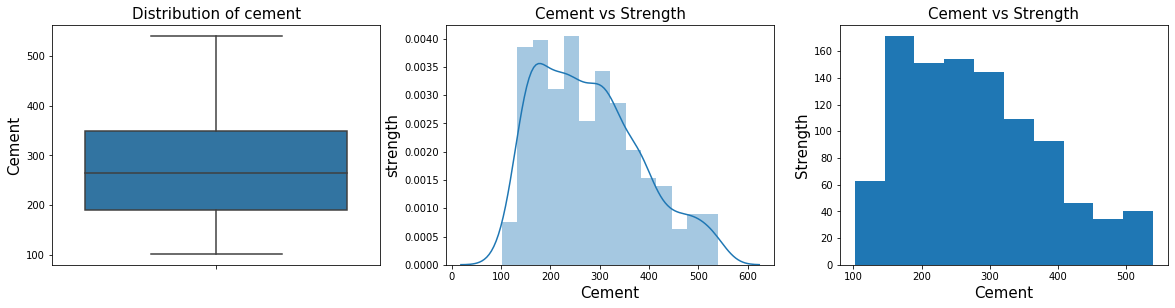

In [19]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='cement',data=con,orient='v')
plt.ylabel('Cement', fontsize=15)
plt.title('Distribution of cement', fontsize=15)

#distplot
plt.subplot(3,3,2)
sns.distplot(con['cement'])
plt.xlabel('Cement', fontsize=15)
plt.ylabel('strength', fontsize=15)
plt.title('Cement vs Strength', fontsize=15)

#histogram
plt.subplot(3,3,3)
plt.hist(con['cement'])
plt.xlabel('Cement', fontsize=15)
plt.ylabel('Strength', fontsize=15)
plt.title('Cement vs Strength', fontsize=15)

#### slag

In [20]:
print('Minimum value: ', con['slag'].min())
print('Maximum value: ',con['slag'].max())
print('Mean value: ', con['slag'].mean())
print('Median value: ',con['slag'].median())
print('Standard deviation: ', con['slag'].std())

Minimum value:  0.0
Maximum value:  359.4
Mean value:  72.04348258706466
Median value:  20.0
Standard deviation:  86.17080699343262


In [21]:
slag=con["slag"]
find_outliers(slag)

The number of outliers present are: 2
Above 356.25 are outliers
range: 359.4
1st quartile(q1): 0.0
3rd quartile(q3): 142.5
Inter quartile range(IQR): 142.5


Text(0.5, 1.0, 'slag vs Strength')

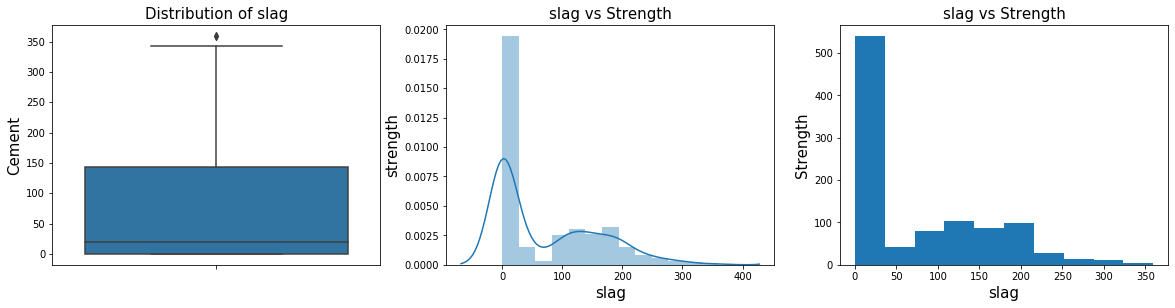

In [22]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='slag',data=con,orient='v')
plt.ylabel('Cement', fontsize=15)
plt.title('Distribution of slag', fontsize=15)

#distplot
plt.subplot(3,3,2)
sns.distplot(con['slag'])
plt.xlabel('slag', fontsize=15)
plt.ylabel('strength', fontsize=15)
plt.title('slag vs Strength', fontsize=15)

#histogram
plt.subplot(3,3,3)
plt.hist(con['slag'])
plt.xlabel('slag', fontsize=15)
plt.ylabel('Strength', fontsize=15)
plt.title('slag vs Strength', fontsize=15)

#### ash

In [23]:
print('Minimum value: ', con['ash'].min())
print('Maximum value: ',con['ash'].max())
print('Mean value: ', con['ash'].mean())
print('Median value: ',con['ash'].median())
print('Standard deviation: ', con['ash'].std())

Minimum value:  0.0
Maximum value:  200.1
Mean value:  55.53631840796018
Median value:  0.0
Standard deviation:  64.20796859777033


In [24]:
ash=con["ash"]
find_outliers(ash)

The number of outliers present are: 0
Above 295.75 are outliers
range: 200.1
1st quartile(q1): 0.0
3rd quartile(q3): 118.3
Inter quartile range(IQR): 118.3


Text(0.5, 1.0, 'ash vs Strength')

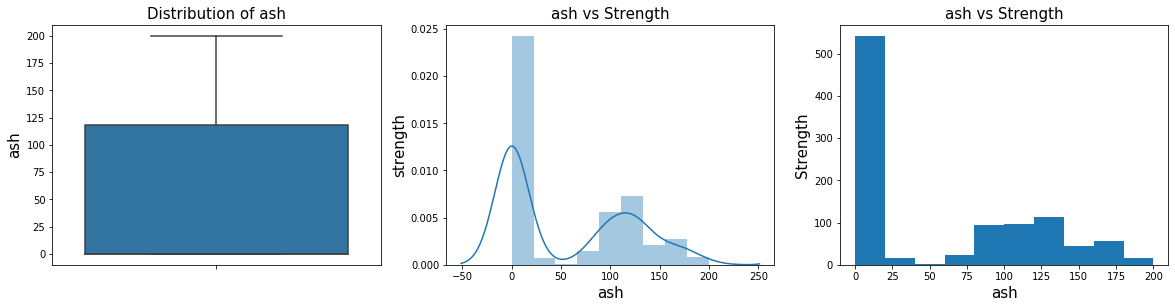

In [25]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='ash',data=con,orient='v')
plt.ylabel('ash', fontsize=15)
plt.title('Distribution of ash', fontsize=15)

#distplot
plt.subplot(3,3,2)
sns.distplot(con['ash'])
plt.xlabel('ash', fontsize=15)
plt.ylabel('strength', fontsize=15)
plt.title('ash vs Strength', fontsize=15)

#histogram
plt.subplot(3,3,3)
plt.hist(con['ash'])
plt.xlabel('ash', fontsize=15)
plt.ylabel('Strength', fontsize=15)
plt.title('ash vs Strength', fontsize=15)

#### Water

In [26]:
print('Minimum value: ', con['water'].min())
print('Maximum value: ',con['water'].max())
print('Mean value: ', con['water'].mean())
print('Median value: ',con['water'].median())
print('Standard deviation: ', con['water'].std())

Minimum value:  121.8
Maximum value:  247.0
Mean value:  182.07532338308457
Median value:  185.7
Standard deviation:  21.339334087611324


In [27]:
water=con["water"]
find_outliers(water)

The number of outliers present are: 15
Above 232.35000000000002 are outliers
range: 125.2
1st quartile(q1): 166.6
3rd quartile(q3): 192.9
Inter quartile range(IQR): 26.30000000000001


Text(0.5, 1.0, 'water vs Strength')

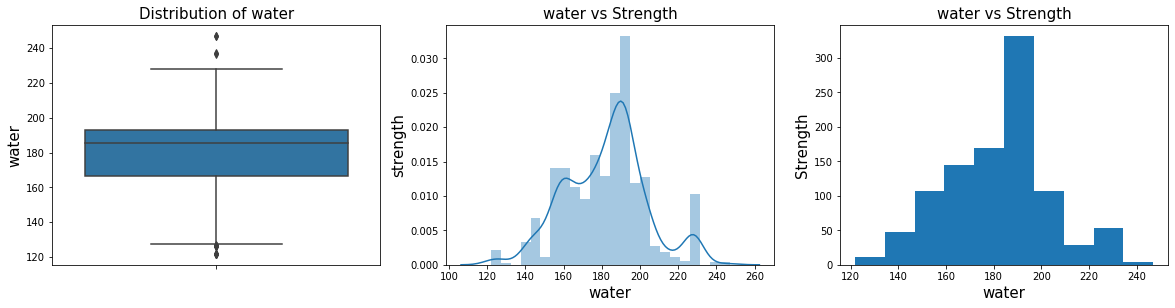

In [28]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='water',data=con,orient='v')
plt.ylabel('water', fontsize=15)
plt.title('Distribution of water', fontsize=15)

#distplot
plt.subplot(3,3,2)
sns.distplot(con['water'])
plt.xlabel('water', fontsize=15)
plt.ylabel('strength', fontsize=15)
plt.title('water vs Strength', fontsize=15)

#histogram
plt.subplot(3,3,3)
plt.hist(con['water'])
plt.xlabel('water', fontsize=15)
plt.ylabel('Strength', fontsize=15)
plt.title('water vs Strength', fontsize=15)

#### Super Plastic

In [29]:
print('Minimum value: ', con['superplastic'].min())
print('Maximum value: ',con['superplastic'].max())
print('Mean value: ', con['superplastic'].mean())
print('Median value: ',con['superplastic'].median())
print('Standard deviation: ', con['superplastic'].std())

Minimum value:  0.0
Maximum value:  32.2
Mean value:  6.033233830845768
Median value:  6.1
Standard deviation:  5.9199667200234325


In [30]:
superplastic=con["superplastic"]
find_outliers(superplastic)

The number of outliers present are: 10
Above 25.0 are outliers
range: 32.2
1st quartile(q1): 0.0
3rd quartile(q3): 10.0
Inter quartile range(IQR): 10.0


Text(0.5, 1.0, 'superplastic vs Strength')

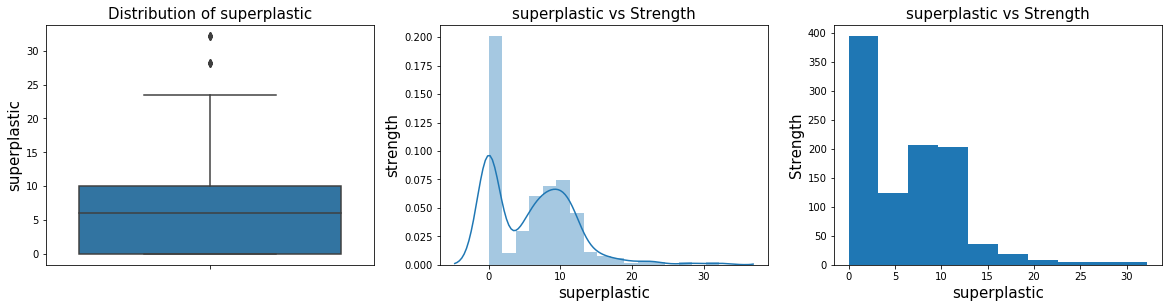

In [31]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='superplastic',data=con,orient='v')
plt.ylabel('superplastic', fontsize=15)
plt.title('Distribution of superplastic', fontsize=15)

#distplot
plt.subplot(3,3,2)
sns.distplot(con['superplastic'])
plt.xlabel('superplastic', fontsize=15)
plt.ylabel('strength', fontsize=15)
plt.title('superplastic vs Strength', fontsize=15)

#histogram
plt.subplot(3,3,3)
plt.hist(con['superplastic'])
plt.xlabel('superplastic', fontsize=15)
plt.ylabel('Strength', fontsize=15)
plt.title('superplastic vs Strength', fontsize=15)

#### coarseagg

In [32]:
print('Minimum value: ', con['coarseagg'].min())
print('Maximum value: ',con['coarseagg'].max())
print('Mean value: ', con['coarseagg'].mean())
print('Median value: ',con['coarseagg'].median())
print('Standard deviation: ', con['coarseagg'].std())

Minimum value:  801.0
Maximum value:  1145.0
Mean value:  974.3768159203987
Median value:  968.0
Standard deviation:  77.57966673714671


In [33]:
coarseagg=con["coarseagg"]
find_outliers(coarseagg)

The number of outliers present are: 0
Above 1179.5 are outliers
range: 344.0
1st quartile(q1): 932.0
3rd quartile(q3): 1031.0
Inter quartile range(IQR): 99.0


Text(0.5, 1.0, 'coarseagg vs Strength')

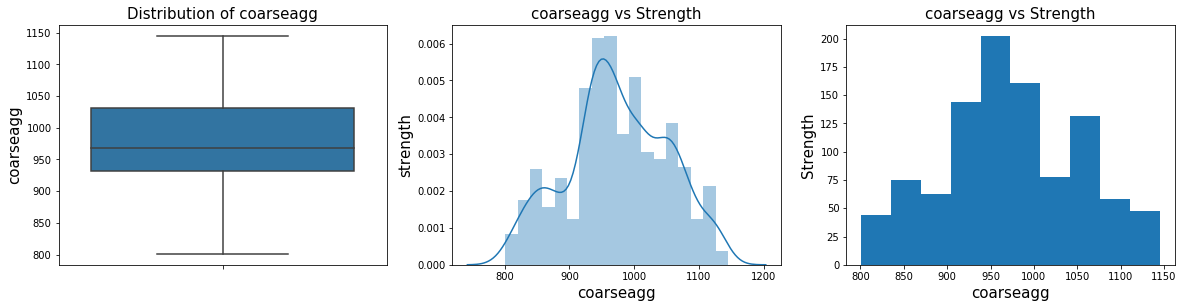

In [34]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='coarseagg',data=con,orient='v')
plt.ylabel('coarseagg', fontsize=15)
plt.title('Distribution of coarseagg', fontsize=15)

#distplot
plt.subplot(3,3,2)
sns.distplot(con['coarseagg'])
plt.xlabel('coarseagg', fontsize=15)
plt.ylabel('strength', fontsize=15)
plt.title('coarseagg vs Strength', fontsize=15)

#histogram
plt.subplot(3,3,3)
plt.hist(con['coarseagg'])
plt.xlabel('coarseagg', fontsize=15)
plt.ylabel('Strength', fontsize=15)
plt.title('coarseagg vs Strength', fontsize=15)

#### Fineagg

In [35]:
print('Minimum value: ', con['fineagg'].min())
print('Maximum value: ',con['fineagg'].max())
print('Mean value: ', con['fineagg'].mean())
print('Median value: ',con['fineagg'].median())
print('Standard deviation: ', con['fineagg'].std())

Minimum value:  594.0
Maximum value:  992.6
Mean value:  772.6882587064675
Median value:  780.0
Standard deviation:  80.34043464964547


In [36]:
fineagg=con["fineagg"]
find_outliers(fineagg)

The number of outliers present are: 5
Above 969.0500000000002 are outliers
range: 398.6
1st quartile(q1): 724.3
3rd quartile(q3): 822.2
Inter quartile range(IQR): 97.90000000000009


Text(0.5, 1.0, 'fineagg vs Strength')

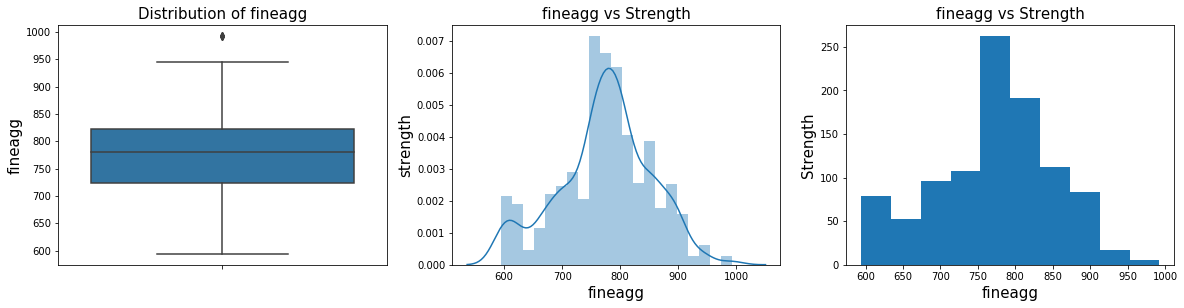

In [37]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='fineagg',data=con,orient='v')
plt.ylabel('fineagg', fontsize=15)
plt.title('Distribution of fineagg', fontsize=15)

#distplot
plt.subplot(3,3,2)
sns.distplot(con['fineagg'])
plt.xlabel('fineagg', fontsize=15)
plt.ylabel('strength', fontsize=15)
plt.title('fineagg vs Strength', fontsize=15)

#histogram
plt.subplot(3,3,3)
plt.hist(con['fineagg'])
plt.xlabel('fineagg', fontsize=15)
plt.ylabel('Strength', fontsize=15)
plt.title('fineagg vs Strength', fontsize=15)

#### Age

In [38]:
print('Minimum value: ', con['age'].min())
print('Maximum value: ',con['age'].max())
print('Mean value: ', con['age'].mean())
print('Median value: ',con['age'].median())
print('Standard deviation: ', con['age'].std())

Minimum value:  1
Maximum value:  365
Mean value:  45.85671641791045
Median value:  28.0
Standard deviation:  63.734691679416535


In [39]:
age=con["age"]
find_outliers(age)

The number of outliers present are: 59
Above 129.5 are outliers
range: 364
1st quartile(q1): 7.0
3rd quartile(q3): 56.0
Inter quartile range(IQR): 49.0


Text(0.5, 1.0, 'age vs Strength')

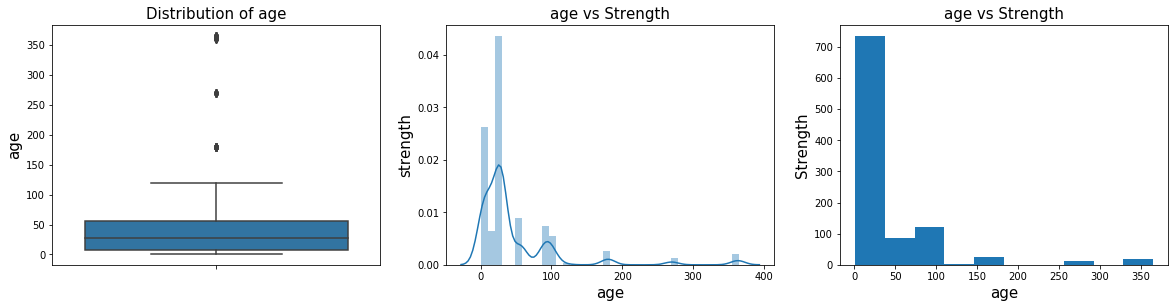

In [40]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='age',data=con,orient='v')
plt.ylabel('age', fontsize=15)
plt.title('Distribution of age', fontsize=15)

#distplot
plt.subplot(3,3,2)
sns.distplot(con['age'])
plt.xlabel('age', fontsize=15)
plt.ylabel('strength', fontsize=15)
plt.title('age vs Strength', fontsize=15)

#histogram
plt.subplot(3,3,3)
plt.hist(con['age'])
plt.xlabel('age', fontsize=15)
plt.ylabel('Strength', fontsize=15)
plt.title('age vs Strength', fontsize=15)

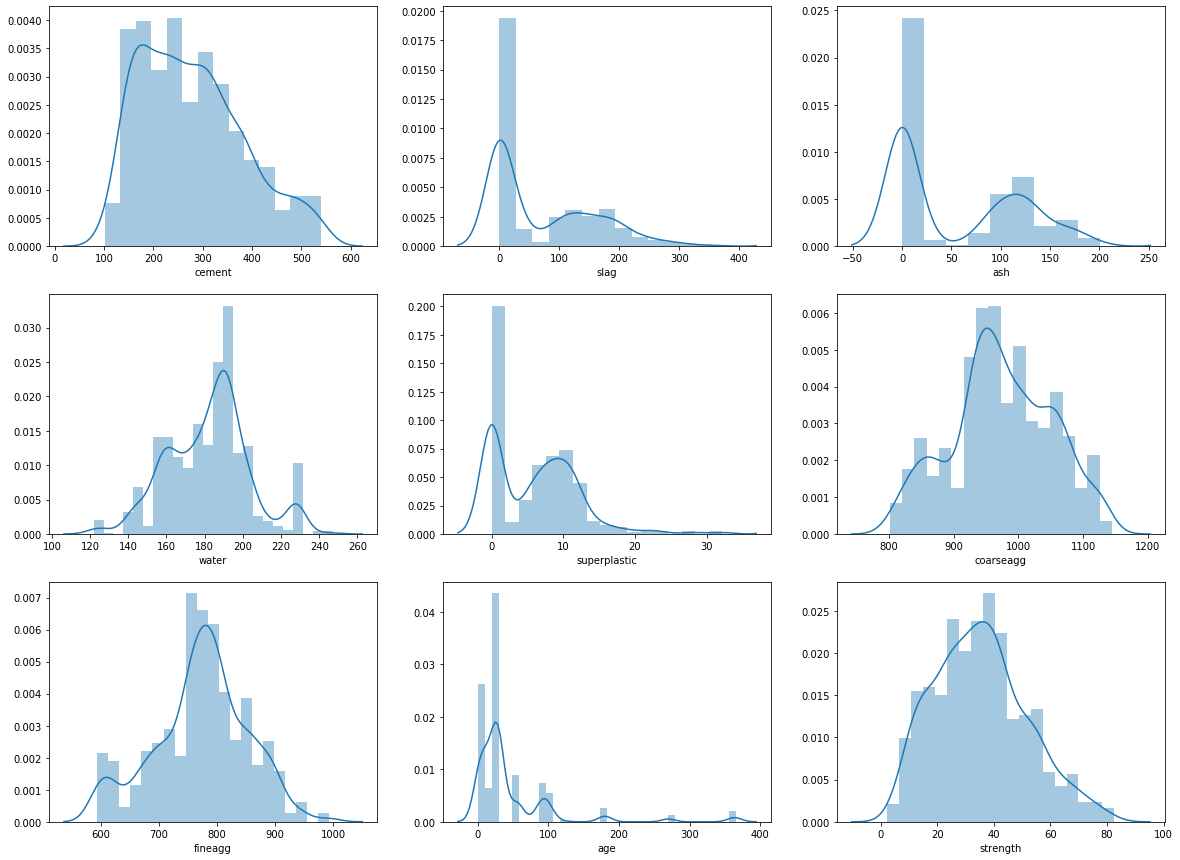

In [41]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(con['cement'])
plt.subplot(3,3,2)
sns.distplot(con['slag'])
plt.subplot(3,3,3)
sns.distplot(con['ash'])
plt.subplot(3,3,4)
sns.distplot(con['water'])
plt.subplot(3,3,5)
sns.distplot(con['superplastic'])
plt.subplot(3,3,6)
sns.distplot(con['coarseagg'])
plt.subplot(3,3,7)
sns.distplot(con['fineagg'])
plt.subplot(3,3,8)
sns.distplot(con['age'])
plt.subplot(3,3,9)
sns.distplot(con['strength'])

Observation

We can see observe that :

-cement is almost normal.

-slag has three gausssians and rightly skewed.

-ash has two gaussians and rightly skewed.

-water has three guassians and almost normal.

-superplastic has two gaussians and rightly skewed.

-coarseagg has three guassians and almost normal.

-fineagg has almost two guassians and slighly left skewed.

-age has multiple guassians and rightly skewed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000EC1F269808>,
      dtype=object)

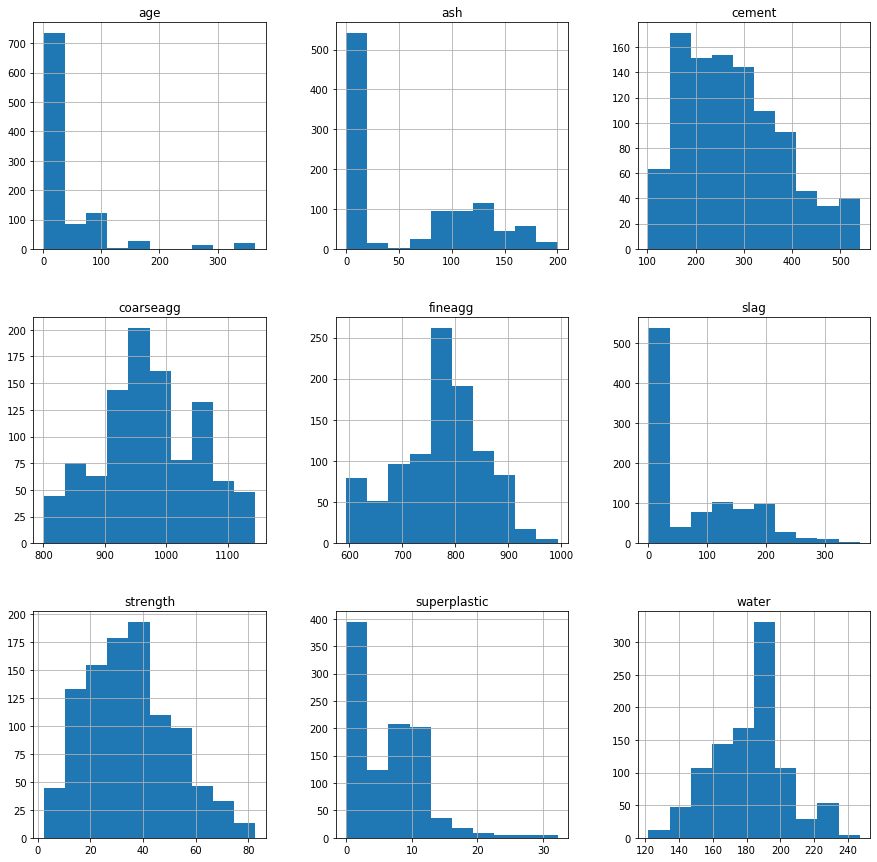

In [42]:
#Histogram
con.hist(figsize=(15,15))

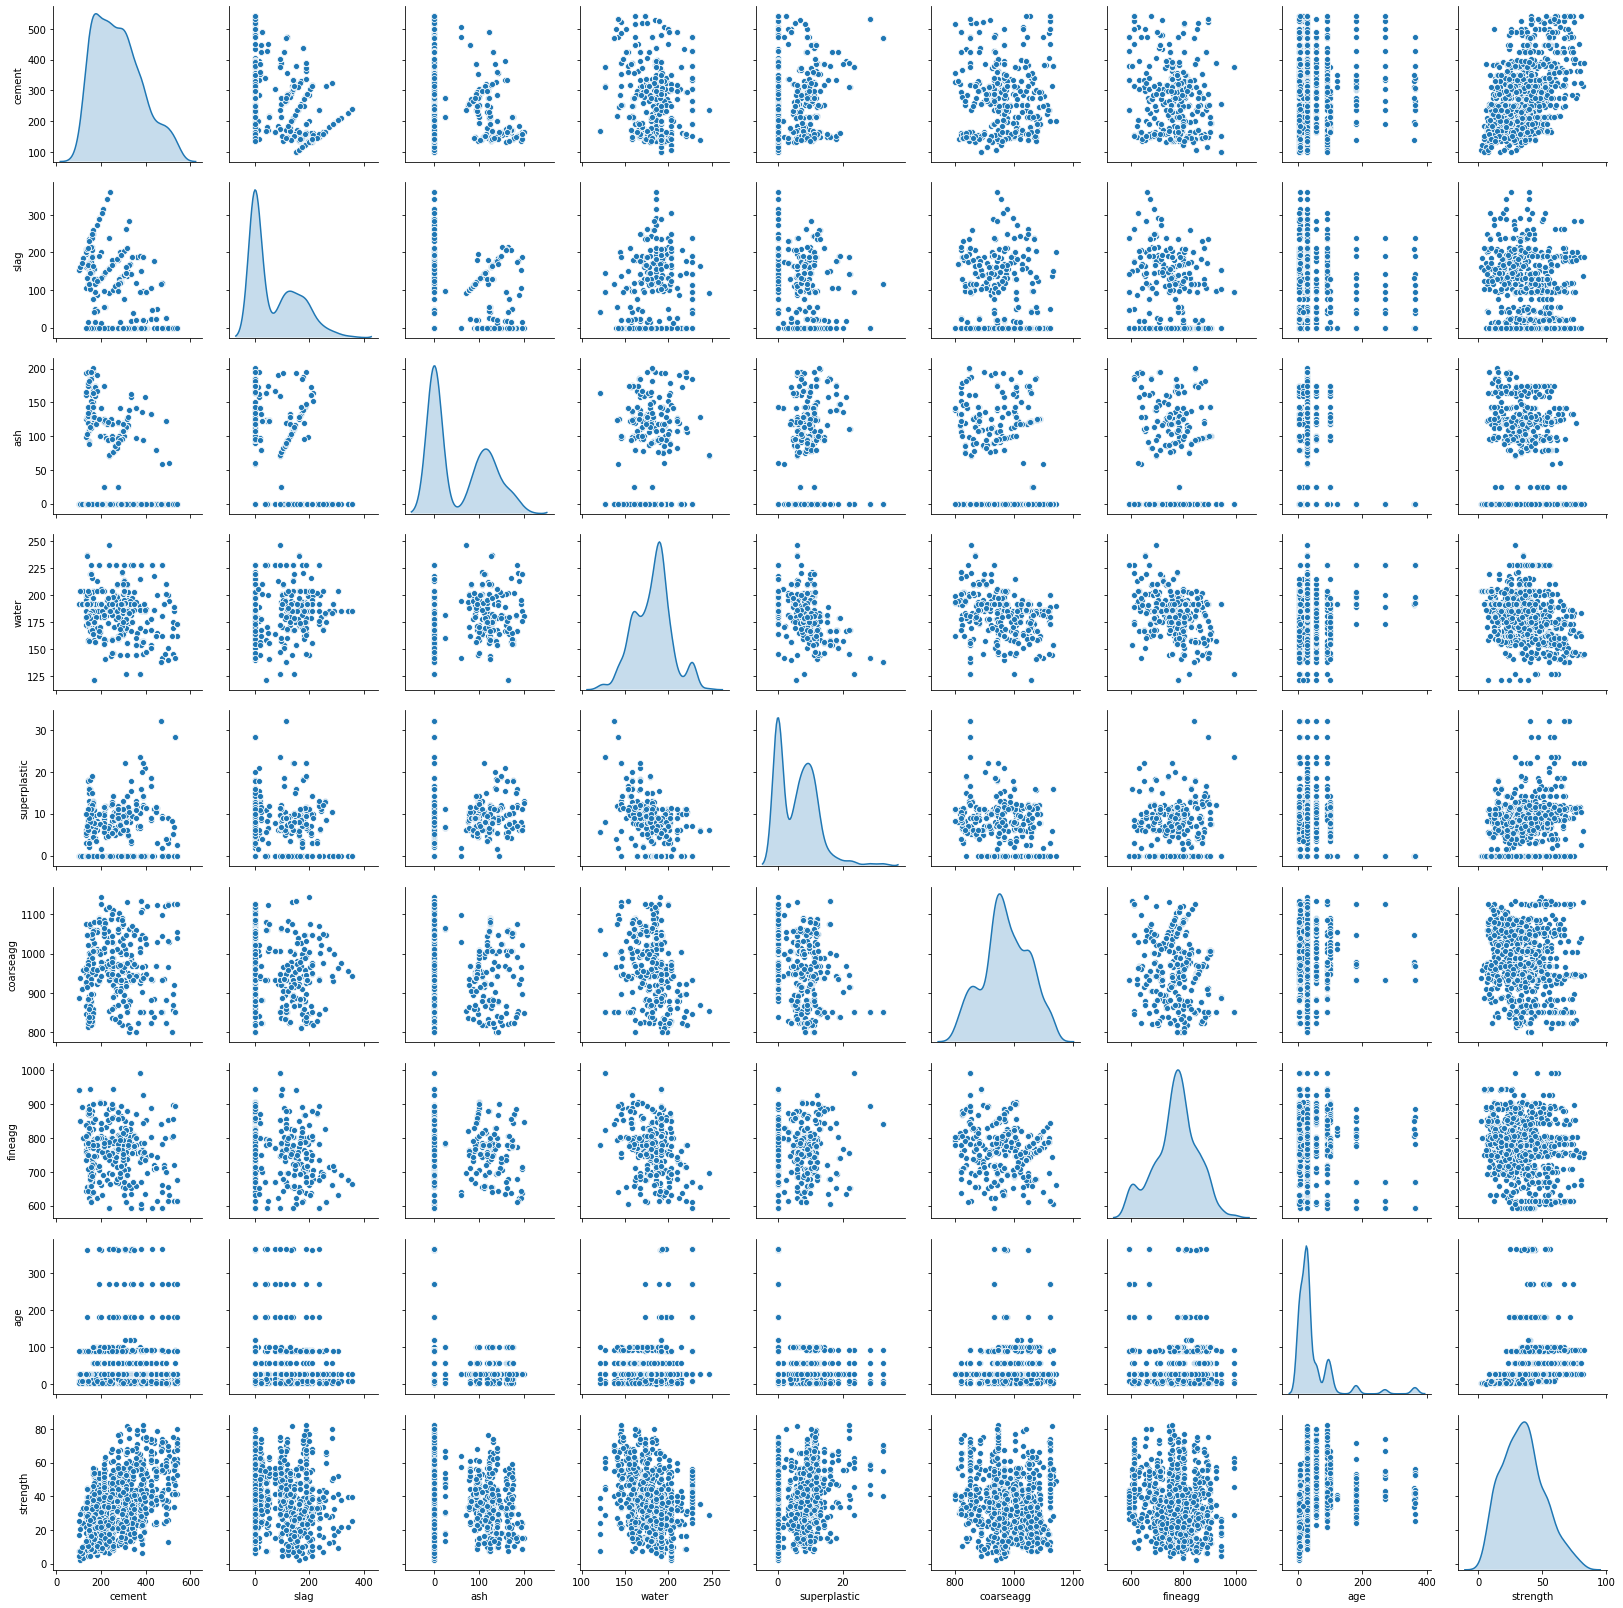

In [43]:
#pair plot
sns.pairplot(con, diag_kind='kde')

In [44]:
cor=con.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplastic,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseagg,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineagg,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


In [84]:
#Handling outliers by replacing it with median value
def outliers_transform_with_replace_median(data):
    num_features=[col for col in data.select_dtypes(np.number).columns ]
    for i,cols in enumerate(num_features,start=1):
        x = data[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
    for i,cols in enumerate(num_features,start=1):
        x = data[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        y=[]
        for p in x:
            if p <ltv or p>utv:
                y.append(np.median(x))
            else:
                y.append(p)
        data[cols]=y
                
    print("\nOutliers in Dataset after Treatment")
    print("====================================")
    for i,cols in enumerate(num_features,start=1):
        x = data[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        count=(data[data[cols]>utv][cols].count())+(data[data[cols]<ltv][cols].count()) 
        print("Column ",cols,"\t has ",count," outliers")
outliers_transform_with_replace_median(con)


Outliers in Dataset after Treatment
Column  cement 	 has  0  outliers
Column  slag 	 has  0  outliers
Column  ash 	 has  0  outliers
Column  water 	 has  0  outliers
Column  superplastic 	 has  0  outliers
Column  coarseagg 	 has  0  outliers
Column  fineagg 	 has  0  outliers
Column  age 	 has  0  outliers
Column  strength 	 has  0  outliers


C:\Users\sidharth\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


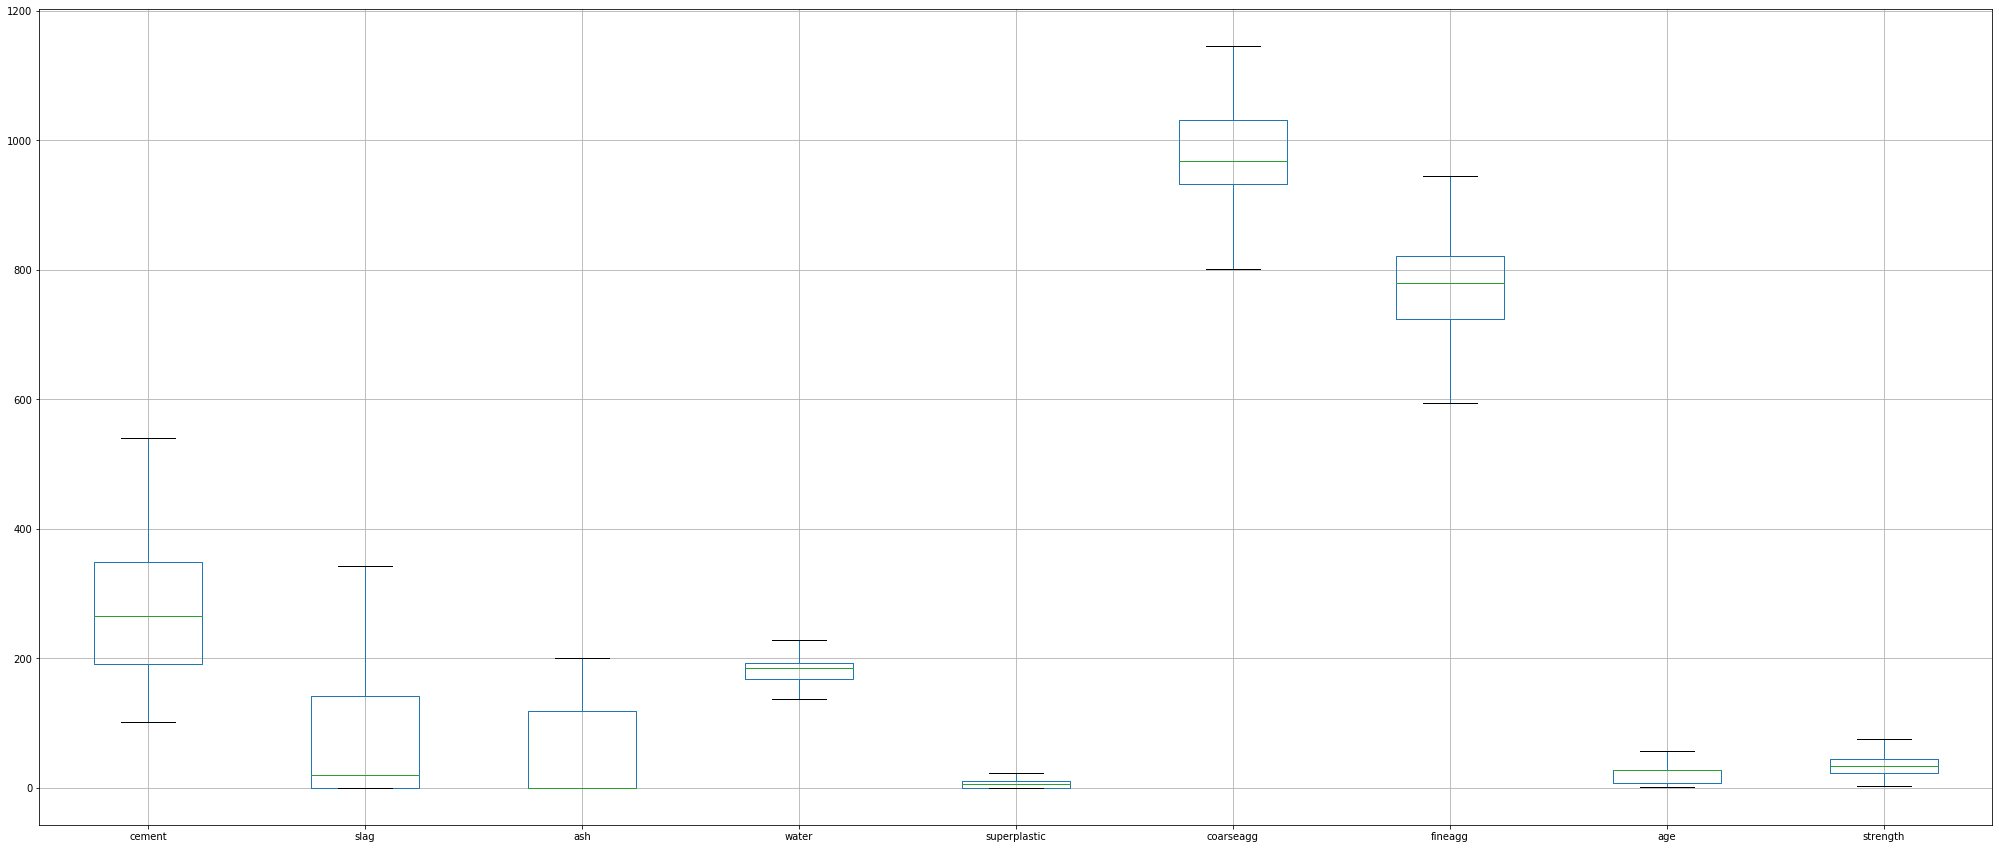

In [85]:
con.boxplot(figsize=(35,15))

Here, all the attributes in the same scale(unit) except the age attribute. Hence, we are scaling the attributes. We are using zscore for scaling.

In [86]:
from scipy.stats import zscore
con_z = con.apply(zscore)
con_z.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.316792,1.650657,-0.865375,1.044518,-1.073915,-0.033232,-0.293599,0.305628,-0.313285
1,-1.052152,-0.342358,1.071486,-1.212290,0.928056,1.372475,0.311864,-0.694183,-0.720508
2,-0.274530,-0.837677,0.625836,0.240655,-0.054393,-0.225388,1.136918,0.305628,-0.356050
3,-0.121115,0.500389,-0.865375,2.267787,-1.073915,-0.546508,-1.290012,0.305628,0.705412
4,-1.187348,1.314966,-0.865375,0.535238,0.612931,0.941736,-0.951105,0.305628,-1.053691


In [87]:
X=con_z.iloc[:,0:8]
y = con_z.iloc[:,8]
print("shape of X :", X.shape)
print("shape of y :", y.shape)

shape of X : (1005, 8)
shape of y : (1005,)


In [88]:
#Splitting Dataset
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [89]:
#check split of data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(con_z.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(con_z.index)) * 100))

69.95% data is in training set
30.05% data is in test set


In [90]:
from sklearn import metrics

In [91]:
#building Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

In [92]:
dTree = DecisionTreeRegressor()
dTree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [93]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.362431
slag          0.080040
ash           0.012793
water         0.063449
superplastic  0.079203
coarseagg     0.035584
fineagg       0.057349
age           0.309151


So, cement, age are significant attributes.
Here, ash, coarseagg, fineagg, superplastic,water and slag are the less significant variable.These will impact less to the strength column.

In [94]:
y_pred = dTree.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dTree.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dTree.score(X_test,y_test))

Performance on training data using DT: 0.9697171627966993
Performance on testing data using DT: 0.6746250181852733


In [95]:
accuracy_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',accuracy_DT)

Accuracy DT:  0.6746250181852733


There is a overfitting in the model as the dataset is performing 99% accurately in trainnig data. However, the accuracy on test data drops.

In [96]:
#reducing overfitting
dTree = DecisionTreeRegressor(max_depth=4,random_state=1)
dTree.fit(X_train, y_train)
y_pred = dTree.predict(X_test)
print('Performance on training data using DT:',dTree.score(X_train,y_train))
accuracy_dt=dTree.score(X_test,y_test)
print('Performance on testing data using DT:',accuracy_dt)

Performance on training data using DT: 0.699697169265218
Performance on testing data using DT: 0.6139104082411782


In [97]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.414815
slag          0.038975
ash           0.000000
water         0.059267
superplastic  0.067673
coarseagg     0.000000
fineagg       0.000000
age           0.419270


In [98]:
#KFold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=1)
results = cross_val_score(dTree, X_train, y_train, cv=kfold)
print(results)
accu_k_dt=results.mean()
print("Accuracy: %.3f%% (%.3f%%)" % (accu_k_dt, results.std()*100.0))

[0.59241931 0.55650177 0.59295595 0.58892192 0.62538319 0.69686825
 0.62870575 0.6996355  0.59784143 0.76252841]
Accuracy: 0.634% (6.135%)


In [99]:
#Iteration 
#Dropping least significant variable
con_z1=con_z.copy()

In [100]:
X = con_z1.drop( ['water','strength','ash','coarseagg','fineagg'] , axis=1)
y = con_z1['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [101]:
dTree_1 = DecisionTreeRegressor(max_depth=4,random_state=1)
dTree_1.fit(X_train, y_train)
y_pred = dTree_1.predict(X_test)
print('Performance on training data using DT:',dTree_1.score(X_train,y_train))
accuracy_dt=dTree_1.score(X_test,y_test)
print('Performance on testing data using DT:',accuracy_dt)

Performance on training data using DT: 0.6944705172795034
Performance on testing data using DT: 0.6187889875547955


In [102]:
#KFold cross validation
kfold = KFold(n_splits=10, random_state=1)
results = cross_val_score(dTree_1, X_train, y_train, cv=kfold)
print(results)
accu_k_dt=results.mean()
print("Accuracy: %.3f%% (%.3f%%)" % (accu_k_dt, results.std()*100.0))

[0.55443699 0.56857448 0.61708829 0.57137591 0.64053506 0.69447378
 0.74005024 0.66293554 0.61342406 0.78327385]
Accuracy: 0.645% (7.224%)


#### K means Clustering

In [103]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

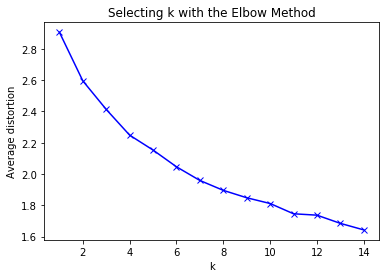

In [104]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,15)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(con_z)
    prediction=model.predict(con_z)
    meanDistortions.append(sum(np.min(cdist(con_z, model.cluster_centers_, 'euclidean'), axis=1)) / con_z.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Though the bend is not coming out clearly as there are many bends, let us look at 6 clusters.

In [105]:
final_model=KMeans(6)
final_model.fit(con_z)
prediction=final_model.predict(con_z)

#Append the prediction 
con_z["GROUP"] = prediction
print("Groups Assigned : \n")
con_z.head()

Groups Assigned : 



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,GROUP
0,-1.316792,1.650657,-0.865375,1.044518,-1.073915,-0.033232,-0.293599,0.305628,-0.313285,2
1,-1.052152,-0.342358,1.071486,-1.212290,0.928056,1.372475,0.311864,-0.694183,-0.720508,1
2,-0.274530,-0.837677,0.625836,0.240655,-0.054393,-0.225388,1.136918,0.305628,-0.356050,1
3,-0.121115,0.500389,-0.865375,2.267787,-1.073915,-0.546508,-1.290012,0.305628,0.705412,3
4,-1.187348,1.314966,-0.865375,0.535238,0.612931,0.941736,-0.951105,0.305628,-1.053691,2


In [106]:
conClust = con_z.groupby(['GROUP'])
conClust.mean()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
GROUP,,,,,,,,,
0,-0.501398,0.289670,1.072259,0.433649,0.599211,-1.226849,-0.334837,0.245460,-0.196851
1,-0.588852,-0.608503,1.084100,-0.713243,0.544845,0.619493,0.436266,0.225795,-0.054713
2,-0.829597,1.466864,-0.854309,0.570846,-0.716722,-0.057990,-0.201555,-0.280232,-0.509964
3,1.435447,-0.438177,-0.706307,1.233105,-0.956516,0.161799,-1.554611,0.086176,0.741428
4,1.044874,0.428884,-0.487660,-0.970529,1.027408,-0.594846,0.148339,0.226810,1.164056
5,0.254925,-0.797820,-0.695977,0.414717,-0.938143,0.449944,0.459368,-0.474620,-0.731536


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000EC27702E08>,
      dtype=object)

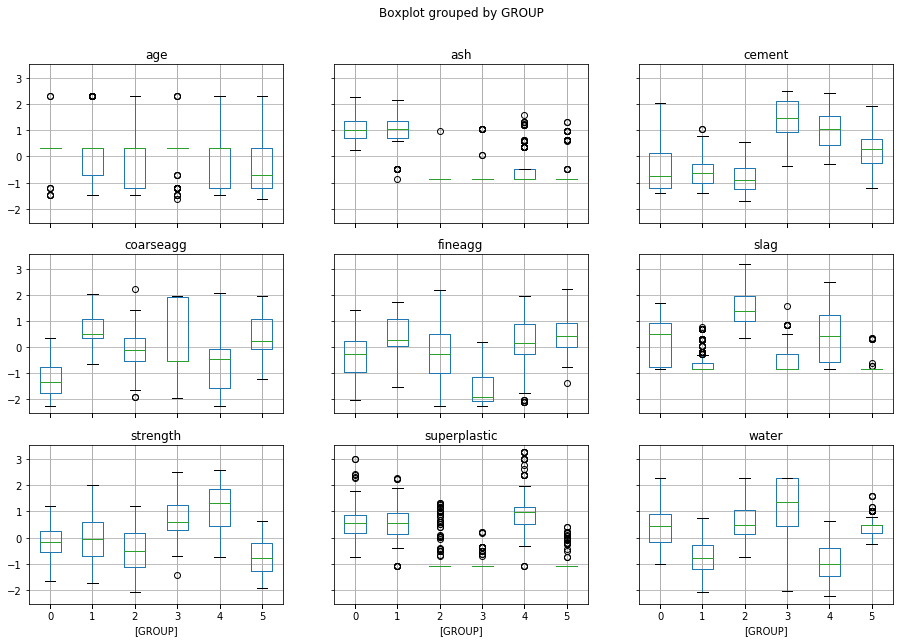

In [107]:
con_z.boxplot(by='GROUP', layout = (3,3),figsize=(15,10))

Here, None of the dimensions are good predictor of target variable.
We can see that the body of the cluster are overlapping.
So in k means, though, there are clusters in datasets on different dimensions. But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them.

#### Random Forest

In [108]:
X=con_z.iloc[:,0:8]
y = con_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [109]:
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)

In [110]:
rf=RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [111]:
y_pred = rf.predict(X_test)
# performance on train data
print('Performance on training data using RFR:',rf.score(X_train,y_train))
# performance on test data
rf_score= rf.score(X_test, y_test)
print('Performance on testing data using RFR:',rf_score)
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy rf: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9452472977854429
Performance on testing data using RFR: 0.7929180187066645
Accuracy rf:  0.7929180187066645
MSE:  0.18588271235706855


This model is also overfit.

In [112]:
#KFold cross validation
kfold = KFold(n_splits=10, random_state=1)
results = cross_val_score(rf, X_train, y_train, cv=kfold)
print(results)
accu_k_rf=results.mean()
print("Accuracy: %.3f%% (%.3f%%)" % (accu_k_rf, results.std()*100.0))

[0.73073174 0.73995396 0.80386503 0.7614228  0.79531355 0.85283974
 0.83498235 0.84976377 0.79988057 0.85584661]
Accuracy: 0.802% (4.414%)


#### Gradient Boosting Regressor

In [113]:
gbr=GradientBoostingRegressor(n_estimators = 50,random_state=1)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [114]:
y_pred = gbr.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',gbr.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',gbr.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy GBR: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.853653794702986
Performance on testing data using GBR: 0.8116485917095452
Accuracy GBR:  0.8116485917095452
MSE:  0.16906961402744772


In [115]:
#KFold cross validation
kfold = KFold(n_splits=10, random_state=1)
results = cross_val_score(gbr, X_train, y_train, cv=kfold)
print(results)
accu_k_gbr=results.mean()
print("Accuracy: %.3f%% (%.3f%%)" % (accu_k_gbr, results.std()*100.0))

[0.71130769 0.7002772  0.76651106 0.77413705 0.78815874 0.84273609
 0.85524628 0.8439525  0.75408814 0.85396866]
Accuracy: 0.789% (5.511%)


#### Ada Boosting Regressor 

In [116]:
abr=AdaBoostRegressor(n_estimators=50, random_state=1)
abr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=1)

In [117]:
y_pred = abr.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',abr.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',abr.score(X_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.754533021230307
Performance on testing data using GBR: 0.7151260438160305
Accuracy DT:  0.7151260438160305
MSE:  0.25571101514793704


In [118]:
#KFold cross validation
kfold = KFold(n_splits=10, random_state=1)
results = cross_val_score(abr, X_train, y_train, cv=kfold)
print(results)
accu_k_abr=results.mean()
print("Accuracy: %.3f%% (%.3f%%)" % (accu_k_abr, results.std()*100.0))

[0.65106044 0.57437493 0.72935585 0.70938534 0.67063008 0.77698742
 0.72519049 0.74972141 0.69167937 0.79723899]
Accuracy: 0.708% (6.162%)


#### Bagging regressor

In [119]:
br=BaggingRegressor(base_estimator=dTree, n_estimators=50,random_state=1)
br.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=4,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=1,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0,

In [120]:
y_pred = br.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',br.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',br.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy br: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.7719377450231795
Performance on testing data using GBR: 0.7049672578761803
Accuracy br:  0.7049672578761803
MSE:  0.26482983211578964


In [121]:
#KFold cross validation
kfold = KFold(n_splits=10, random_state=1)
results = cross_val_score(br, X_train, y_train, cv=kfold)
print(results)
accu_k_br=results.mean()
print("Accuracy: %.3f%% (%.3f%%)" % (accu_k_br, results.std()*100.0))

[0.62965053 0.62798498 0.70550991 0.64718094 0.72325596 0.78210928
 0.79027671 0.73916715 0.67198745 0.78468962]
Accuracy: 0.710% (6.070%)


#### KNN Regressor

In [122]:
from sklearn.neighbors import KNeighborsRegressor

In [123]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [126]:
y_pred = knn.predict(X_test)
# performance on train data
print('Performance on training data using KNNR:',knn.score(X_train,y_train))
# performance on test data
print('Performance on testing data using KNNR:',knn.score(X_test,y_test))
#Evaluate the model using accuracy
acc_Knn=metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ',acc_Knn)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using KNNR: 0.8334691526293321
Performance on testing data using KNNR: 0.6966574025546171
Accuracy KNNR:  0.6966574025546171
MSE:  0.2722889960508641


In [127]:
#KFold cross validation
kfold = KFold(n_splits=10, random_state=1)
results = cross_val_score(knn, X_train, y_train, cv=kfold)
print(results)
accu_k_knn=results.mean()
print("Accuracy: %.3f%% (%.3f%%)" % (accu_k_knn, results.std()*100.0))

[0.55578464 0.68842093 0.79331028 0.69796638 0.76062059 0.84768674
 0.75197455 0.83437912 0.71602655 0.77554936]
Accuracy: 0.742% (8.004%)


#### Support Vector Regressor

In [128]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [129]:
y_pred = svr.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',svr.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',svr.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.6625768607827547
Performance on testing data using SVR: 0.6694072742255569
Accuracy SVR:  0.6694072742255569
MSE:  0.29674949104056947


In [130]:
#KFold cross validation
kfold = KFold(n_splits=10, random_state=1)
results = cross_val_score(svr, X_train, y_train, cv=kfold)
print(results)
accu_k_svr=results.mean()
print("Accuracy: %.3f%% (%.3f%%)" % (accu_k_svr, results.std()*100.0))

[0.51755733 0.62752289 0.73493147 0.62393114 0.6704565  0.71312215
 0.67381355 0.63475369 0.61722606 0.692191  ]
Accuracy: 0.651% (5.830%)


In [131]:
result = pd.DataFrame({'TrainTest' : ['decision_tree', 'decision_tree_kfold','pruned_dtree','pruned_dtree_kfold', 'random_forest','random_forest_kfold','gardient_boost','gardient_boost_kfold','ada_boost','ada_boost_kfold','bagging','bagging_kfold','knn','knn_kfold','svr','svr_kfold'], 
                       'Accuracy' : [accuracy_dt,accu_k_dt,accuracy_dt,accu_k_dt,acc_RFR,accu_k_rf,acc_GBR,accu_k_gbr,acc_ABR,accu_k_abr,acc_BR,accu_k_br,acc_Knn,accu_k_knn,acc_S,accu_k_svr],
                      })
result

,TrainTest,Accuracy
0,decision_tree,0.618789
1,decision_tree_kfold,0.644617
2,pruned_dtree,0.618789
3,pruned_dtree_kfold,0.644617
4,random_forest,0.792918
5,random_forest_kfold,0.802460
6,gardient_boost,0.811649
7,gardient_boost_kfold,0.789038
8,ada_boost,0.715126
9,ada_boost_kfold,0.707562


1) After applying all the models we can see that Random Forest Regressor, Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k fold are giving better results as compared to other models.

2) Now as the dataset have different gaussians, we can apply k means clustering and then we can apply the models and compare the accuracy.

#### Bootstrap Sampling

In [132]:
#Gradient Boosting
values = con_z.values

In [133]:
# configure bootstrap
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(con_z) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

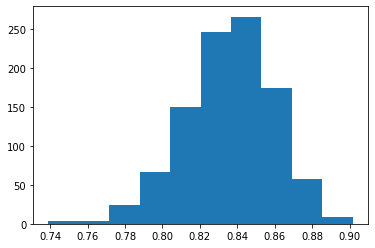

95.0 confidence interval 78.5% and 87.7%


In [135]:
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [136]:
#Random Forest
# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=10)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  
    stats.append(score)

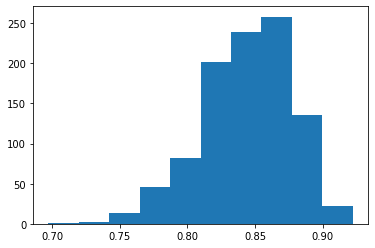

95.0 confidence interval 77.1% and 89.7%


In [137]:
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

The bootstrap random forest classification model performance is between 77.1%-89.7% which is better than other classification algorithms.